# **PreProsesing I**

Mengambil Atribut odometer dan long untuk di **clustering 1**

In [801]:
import pandas as pd
df = pd.read_csv('used_cars.csv') # membaca data csv model pertama yang diberikan
df


,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,WVWPF7AJ6CW316713,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTMF1EP3GKF13544,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,gas,7554.0,clean,automatic,3GTU2WEC6FG228025,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTEX1EF6GKD25447,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,diesel,70150.0,clean,automatic,1FT8W4DT8GEA90427,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,7049052853,https://kpr.craigslist.org/ctd/d/pasco-diesels...,kennewick-pasco-richland,https://kpr.craigslist.org,49999,2016.0,ram,cummin 2500 laramie,NaN,NaN,diesel,43406.0,clean,automatic,3C6UR5FL7GG142137,4wd,NaN,truck,grey,https://images.craigslist.org/00h0h_d5xQ6Q7Ygd...,Call or Text 509-412-3404 2016 Dodge Ram 2500...,NaN,wa,46.2348,-119.128
19997,19997,7049052797,https://kpr.craigslist.org/ctd/d/yakima-2018-n...,kennewick-pasco-richland,https://kpr.craigslist.org,12127,2018.0,nissan,sentra,NaN,4 cylinders,gas,32867.0,clean,automatic,3N1AB7AP4JY251861,fwd,NaN,sedan,NaN,https://images.craigslist.org/00Y0Y_cuQ8XIP5R4...,Bud Clary Toyota of YakimaÂ Â Â Â Â Â Â Â STOC...,NaN,wa,46.5642,-120.496
19998,19998,7049049369,https://kpr.craigslist.org/ctd/d/walla-walla-2...,kennewick-pasco-richland,https://kpr.craigslist.org,0,2019.0,jeep,grand cherokee limited,NaN,6 cylinders,gas,17514.0,clean,automatic,1C4RJFBG9KC713921,4wd,NaN,SUV,NaN,https://images.craigslist.org/00h0h_gvXVsydGQd...,Chrysler Dodge Jeep Ram of Walla WallaÂ Â Â Â ...,NaN,wa,46.0783,-118.293
19999,19999,7049042761,https://kpr.craigslist.org/ctd/d/yakima-2017-t...,kennewick-pasco-richland,https://kpr.craigslist.org,14661,2017.0,toyota,corolla,NaN,4 cylinders,gas,30486.0,clean,automatic,2T1BURHE5HC804636,fwd,NaN,sedan,NaN,https://images.craigslist.org/00P0P_94PZlFJECu...,Bud Clary Toyota of YakimaÂ Â Â Â Â Â Â Â STOC...,NaN,wa,46.5642,-120.496


In [802]:
data=pd.DataFrame(df) 
data.describe() # menampilkan statistik dari data berupa mean count std min percentil dan max

,Unnamed: 0,id,price,year,odometer,county,lat,long
count,20001.000000,2.000100e+04,2.000100e+04,19989.000000,1.761200e+04,0.0,18970.000000,18970.000000
mean,10000.000000,7.043199e+09,7.664058e+04,2009.830657,9.916435e+04,NaN,40.394737,-86.300395
std,5773.935703,4.668820e+06,8.335762e+06,7.913613,7.963487e+04,NaN,4.440290,18.219242
min,0.000000,7.032597e+09,0.000000e+00,1917.000000,0.000000e+00,NaN,-51.812200,-155.901000
25%,5000.000000,7.040114e+09,3.970000e+03,2007.000000,5.013300e+04,NaN,37.273700,-80.166800
50%,10000.000000,7.043866e+09,8.795000e+03,2011.000000,9.389900e+04,NaN,38.258600,-77.514200
75%,15000.000000,7.047065e+09,1.749500e+04,2015.000000,1.339090e+05,NaN,44.439500,-76.238400
max,20000.000000,7.050101e+09,1.172420e+09,2020.000000,2.500005e+06,NaN,59.746600,9.095700


In [803]:
data.isnull().sum() #untuk mengecek apakah ada data yang missing

Unnamed: 0          0
id                  0
url                 0
region              0
region_url          0
price               0
year               12
manufacturer      705
model             265
condition        9152
cylinders        7085
fuel               73
odometer         2389
title_status      110
transmission      190
vin              6645
drive            4642
size            13115
type             3659
paint_color      5514
image_url           0
description         0
county          20001
state               0
lat              1031
long             1031
dtype: int64

terjadi missing di atribut year,manufacturer,model,cylinders,fuel,,odometer,titke_status,transmission,vins,drive,sizw,type,point_color,county,lat dan long


In [804]:
data.dtypes # mengetahui type data nya 

Unnamed: 0        int64
id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
vin              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
dtype: object

In [805]:
data_pre= data[['id','year','price','odometer','lat','long']] #saya tidak mengambil atribut semuannya hanya memanggil atribut id,year,prixe,odometer,lat dan long
data_pre

,id,year,price,odometer,lat,long
0,7034441763,2012.0,17899,63500.0,40.7372,-111.858
1,7034440610,2016.0,0,10.0,40.5881,-111.884
2,7034440588,2015.0,46463,7554.0,40.5881,-111.884
3,7034440546,2016.0,0,10.0,40.5881,-111.884
4,7034406932,2018.0,49999,70150.0,40.3744,-104.694
...,...,...,...,...,...,...
19996,7049052853,2016.0,49999,43406.0,46.2348,-119.128
19997,7049052797,2018.0,12127,32867.0,46.5642,-120.496
19998,7049049369,2019.0,0,17514.0,46.0783,-118.293
19999,7049042761,2017.0,14661,30486.0,46.5642,-120.496


In [806]:
clear_dt_Empty=data_pre.dropna() #menghapus value yang Nan atau null
len(clear_dt_Empty) 


16572

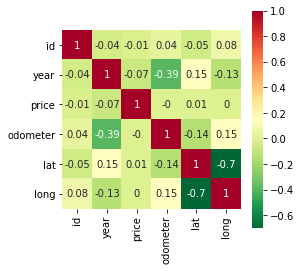

In [807]:
#untuk membuat corelasi dalam menentukkan Atribut apa yang ingin dipilih
import matplotlib.pyplot as plt
import seaborn as sns
correlation = clear_dt_Empty.corr()
plt.subplots(figsize = (4,4))
sns.heatmap(correlation.round(2), 
            annot = True, 
            vmax = 1, 
            square = True, 
            cmap = 'RdYlGn_r')
plt.show()


In [808]:
#mengambil Atribut yang ingin digunakan
data_After= clear_dt_Empty[['odometer','long']]
data_After

,odometer,long
0,63500.0,-111.858
1,10.0,-111.884
2,7554.0,-111.884
3,10.0,-111.884
4,70150.0,-104.694
...,...,...
19996,43406.0,-119.128
19997,32867.0,-120.496
19998,17514.0,-118.293
19999,30486.0,-120.496


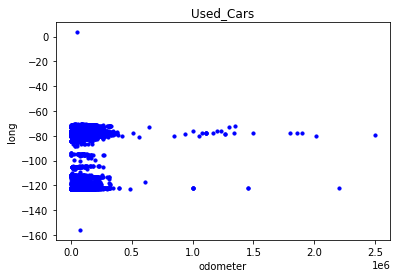

In [809]:
x_Odometer=clear_dt_Empty['odometer'] #plot persebaran data Atribut odometer dan long yang sudah dihapus missing valuenya
y_Long= clear_dt_Empty['long'] 
# print(data)
plt.scatter(x_Odometer, y_Long, s=10, c="b", marker="o")
plt.title('Used_Cars')
plt.xlabel('odometer')
plt.ylabel('long')
plt.show()

In [810]:
#menghapus nilai yang tidak memenuhi kondisi 
choice_outlier = data_After.loc[(clear_dt_Empty['odometer'] > 170000 ) | (clear_dt_Empty['odometer'] < 76000)| (clear_dt_Empty['long'] > 0.1) ]
temp_clean= data_After.drop(choice_outlier.index)
temp_clean

,odometer,long
5,120057.0,-104.694
6,95484.0,-104.694
7,89340.0,-104.694
9,128153.0,-104.694
10,168838.0,-104.694
...,...,...
19977,157675.0,-119.285
19980,139784.0,-118.293
19982,120242.0,-119.285
19987,79831.0,-119.128


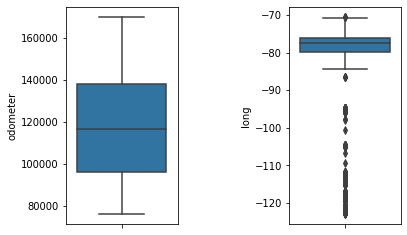

In [811]:
#cek apakah terdapat outliers
f, axes = plt.subplots(1, 2)
sns.boxplot(y=temp_clean["odometer"], ax=axes[0])
sns.boxplot(y=temp_clean["long"], ax=axes[1])
plt.subplots_adjust(wspace=1)

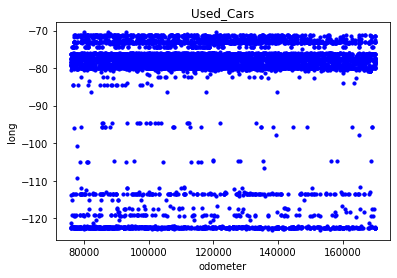

In [812]:
x_Odometer=temp_clean['odometer'] #menampilkan plot yang value Atribut yang dioutlierkan 
y_Long= temp_clean['long'] 
plt.scatter(x_Odometer, y_Long, s=10, c="b", marker="o")
plt.title('Used_Cars')
plt.xlabel('odometer')
plt.ylabel('long')
plt.show()


In [813]:
#normalisasi data untuk menentukan range yang sama 
#menggunakan atribut odometer
from sklearn.preprocessing import MinMaxScaler 
float_array1 = temp_clean['odometer'].values.astype(float)
float_array = float_array1.reshape(-1,1)
min_max_scaler_odometer = MinMaxScaler()
scaled_array_odometer = min_max_scaler_odometer.fit_transform(float_array)
temp_clean['odometer'] = scaled_array_odometer
temp_odometer=pd.DataFrame(temp_clean['odometer'])
temp_odometer


,odometer
5,0.468691
6,0.207277
7,0.141915
9,0.554819
10,0.987638
...,...
19977,0.868883
19980,0.678553
19982,0.470660
19987,0.040755


In [814]:
#normalisasi data untuk menentukan range yang sama 
#menggunakan atribut long
float_array2 = temp_clean['long'].values.astype(float)
float_array = float_array2.reshape(-1,1)
min_max_scaler_Long = MinMaxScaler()
scaled_array_Long = min_max_scaler_Long.fit_transform(float_array)
temp_clean['long'] = scaled_array_Long
temp_Long=pd.DataFrame(temp_clean['long'])
temp_Long

,long
5,0.349556
6,0.349556
7,0.349556
9,0.349556
10,0.349556
...,...
19977,0.072377
19980,0.091221
19982,0.072377
19987,0.075359


In [815]:
import numpy as np #menggabungkan dua atribut odometer dan long yang telah dinormalisasi valuenya
f1=temp_odometer['odometer'].values
f2= temp_Long['long'].values
data_temp= np.array(list(zip(f1,f2)))
new_dt = pd.DataFrame(data_temp)
new_col =['odometer','long']
new_dt =pd.DataFrame(data_temp,columns=new_col)
new_dt



,odometer,long
0,0.468691,0.349556
1,0.207277,0.349556
2,0.141915,0.349556
3,0.554819,0.349556
4,0.987638,0.349556
...,...,...
8343,0.868883,0.072377
8344,0.678553,0.091221
8345,0.470660,0.072377
8346,0.040755,0.075359


# **Cluestering** **model 1** 

Cluestering dengan Atribut **odometer dan long**

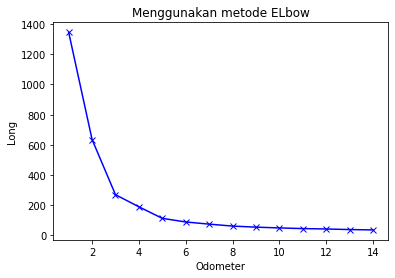

In [816]:
from sklearn.cluster import KMeans#untuk mengecek untuk mendapatkan nilai K yang terbaik dan tidak import library
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(new_dt)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Odometer')
plt.ylabel('Long')
plt.title('Menggunakan metode ELbow')
plt.show()


In [817]:
df_x=new_dt
df_x


,odometer,long
0,0.468691,0.349556
1,0.207277,0.349556
2,0.141915,0.349556
3,0.554819,0.349556
4,0.987638,0.349556
...,...,...
8343,0.868883,0.072377
8344,0.678553,0.091221
8345,0.470660,0.072377
8346,0.040755,0.075359


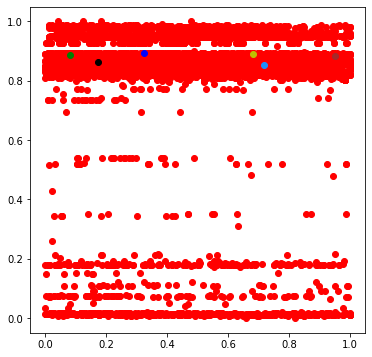

In [818]:
import random
k = 6
df_x=pd.DataFrame(new_dt)
centroids = {
    i+1: [np.random.choice(df_x['odometer']), np.random.choice(df_x['long'])]
    for i in range(k)
}
    
fig = plt.figure(figsize=(6, 6))
plt.scatter(df_x['odometer'], df_x['long'], color='r')
colmap = {1: 'g', 2: 'k', 3: 'b', 4:'y',5:'dodgerblue',6:'brown'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

In [0]:

def Euclidean_Distance(df_x, centroids):
    for i in centroids.keys():
        df_x['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df_x['odometer'] - centroids[i][0]) ** 2
                + (df_x['long'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df_x['rate_jarak'] = df_x.loc[:, centroid_distance_cols].idxmin(axis=1)
    df_x['rate_jarak'] = df_x['rate_jarak'].map(lambda x: int(x.lstrip('distance_from_')))
    df_x['color'] = df_x['rate_jarak'].map(lambda x: colmap[x])
    return df_x

df_x = Euclidean_Distance(df_x, centroids)


In [0]:

import copy
old_centroids = copy.deepcopy(centroids)
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df_x[df_x['rate_jarak'] == i]['odometer'])
        centroids[i][1] = np.mean(df_x[df_x['rate_jarak'] == i]['long'])
    return k



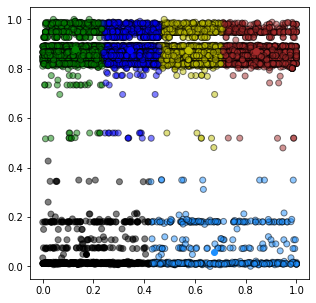

In [821]:
while True:
    closest_centroids = df_x['rate_jarak'].copy(deep=True)
    centroids = update(centroids)
    df_x = Euclidean_Distance(df_x, centroids)
    if closest_centroids.equals(df_x['rate_jarak']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df_x['odometer'], df_x['long'], color=df_x['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

In [822]:
df_x

,odometer,long,distance_from_1,distance_from_2,distance_from_3,distance_from_4,distance_from_5,distance_from_6,rate_jarak,color
0,0.468691,0.349556,0.629864,0.419865,0.541497,0.538733,0.357779,0.643387,5,dodgerblue
1,0.207277,0.349556,0.535157,0.299418,0.544960,0.643127,0.552278,0.822990,2,k
2,0.141915,0.349556,0.529305,0.298912,0.565049,0.682510,0.608791,0.874369,2,k
3,0.554819,0.349556,0.680451,0.484524,0.567373,0.528693,0.315628,0.597587,5,dodgerblue
4,0.987638,0.349556,1.010311,0.867893,0.831093,0.671024,0.426135,0.544146,5,dodgerblue
...,...,...,...,...,...,...,...,...,...,...
8343,0.868883,0.072377,1.095693,0.696897,0.959857,0.857815,0.192858,0.801854,5,dodgerblue
8344,0.678553,0.091221,0.961411,0.507777,0.853368,0.793602,0.032943,0.799377,5,dodgerblue
8345,0.470660,0.072377,0.876478,0.299063,0.814130,0.812123,0.206354,0.883127,5,dodgerblue
8346,0.040755,0.075359,0.807901,0.133549,0.857291,0.963530,0.636009,1.130927,2,k


# **PreProsesing** **2**

Mengambil Atribut long dan lat untuk di **clustering 2**

In [823]:
import pandas as pd #membaca data untuk model kedua
df = pd.read_csv('used_cars.csv')
df 

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,WVWPF7AJ6CW316713,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTMF1EP3GKF13544,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,gas,7554.0,clean,automatic,3GTU2WEC6FG228025,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTEX1EF6GKD25447,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,diesel,70150.0,clean,automatic,1FT8W4DT8GEA90427,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,7049052853,https://kpr.craigslist.org/ctd/d/pasco-diesels...,kennewick-pasco-richland,https://kpr.craigslist.org,49999,2016.0,ram,cummin 2500 laramie,NaN,NaN,diesel,43406.0,clean,automatic,3C6UR5FL7GG142137,4wd,NaN,truck,grey,https://images.craigslist.org/00h0h_d5xQ6Q7Ygd...,Call or Text 509-412-3404 2016 Dodge Ram 2500...,NaN,wa,46.2348,-119.128
19997,19997,7049052797,https://kpr.craigslist.org/ctd/d/yakima-2018-n...,kennewick-pasco-richland,https://kpr.craigslist.org,12127,2018.0,nissan,sentra,NaN,4 cylinders,gas,32867.0,clean,automatic,3N1AB7AP4JY251861,fwd,NaN,sedan,NaN,https://images.craigslist.org/00Y0Y_cuQ8XIP5R4...,Bud Clary Toyota of YakimaÂ Â Â Â Â Â Â Â STOC...,NaN,wa,46.5642,-120.496
19998,19998,7049049369,https://kpr.craigslist.org/ctd/d/walla-walla-2...,kennewick-pasco-richland,https://kpr.craigslist.org,0,2019.0,jeep,grand cherokee limited,NaN,6 cylinders,gas,17514.0,clean,automatic,1C4RJFBG9KC713921,4wd,NaN,SUV,NaN,https://images.craigslist.org/00h0h_gvXVsydGQd...,Chrysler Dodge Jeep Ram of Walla WallaÂ Â Â Â ...,NaN,wa,46.0783,-118.293
19999,19999,7049042761,https://kpr.craigslist.org/ctd/d/yakima-2017-t...,kennewick-pasco-richland,https://kpr.craigslist.org,14661,2017.0,toyota,corolla,NaN,4 cylinders,gas,30486.0,clean,automatic,2T1BURHE5HC804636,fwd,NaN,sedan,NaN,https://images.craigslist.org/00P0P_94PZlFJECu...,Bud Clary Toyota of YakimaÂ Â Â Â Â Â Â Â STOC...,NaN,wa,46.5642,-120.496


In [824]:
data=pd.DataFrame(df)
data.describe()

,Unnamed: 0,id,price,year,odometer,county,lat,long
count,20001.000000,2.000100e+04,2.000100e+04,19989.000000,1.761200e+04,0.0,18970.000000,18970.000000
mean,10000.000000,7.043199e+09,7.664058e+04,2009.830657,9.916435e+04,NaN,40.394737,-86.300395
std,5773.935703,4.668820e+06,8.335762e+06,7.913613,7.963487e+04,NaN,4.440290,18.219242
min,0.000000,7.032597e+09,0.000000e+00,1917.000000,0.000000e+00,NaN,-51.812200,-155.901000
25%,5000.000000,7.040114e+09,3.970000e+03,2007.000000,5.013300e+04,NaN,37.273700,-80.166800
50%,10000.000000,7.043866e+09,8.795000e+03,2011.000000,9.389900e+04,NaN,38.258600,-77.514200
75%,15000.000000,7.047065e+09,1.749500e+04,2015.000000,1.339090e+05,NaN,44.439500,-76.238400
max,20000.000000,7.050101e+09,1.172420e+09,2020.000000,2.500005e+06,NaN,59.746600,9.095700


In [825]:
data.isnull().sum()

Unnamed: 0          0
id                  0
url                 0
region              0
region_url          0
price               0
year               12
manufacturer      705
model             265
condition        9152
cylinders        7085
fuel               73
odometer         2389
title_status      110
transmission      190
vin              6645
drive            4642
size            13115
type             3659
paint_color      5514
image_url           0
description         0
county          20001
state               0
lat              1031
long             1031
dtype: int64

In [826]:
data.dtypes

Unnamed: 0        int64
id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
vin              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
dtype: object

In [827]:
data_pre= data[['id','year','price','odometer','lat','long']]
data_pre

,id,year,price,odometer,lat,long
0,7034441763,2012.0,17899,63500.0,40.7372,-111.858
1,7034440610,2016.0,0,10.0,40.5881,-111.884
2,7034440588,2015.0,46463,7554.0,40.5881,-111.884
3,7034440546,2016.0,0,10.0,40.5881,-111.884
4,7034406932,2018.0,49999,70150.0,40.3744,-104.694
...,...,...,...,...,...,...
19996,7049052853,2016.0,49999,43406.0,46.2348,-119.128
19997,7049052797,2018.0,12127,32867.0,46.5642,-120.496
19998,7049049369,2019.0,0,17514.0,46.0783,-118.293
19999,7049042761,2017.0,14661,30486.0,46.5642,-120.496


In [828]:
clear_dt_Empty=data_pre.dropna() #menghapus data yang value atributnya kosong atau null
len(clear_dt_Empty)

16572

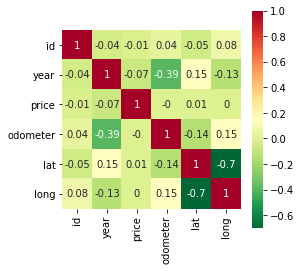

In [829]:
import matplotlib.pyplot as plt #corlasi untuk menentukan atribut yang ingin digunakan
import seaborn as sns
correlation = clear_dt_Empty.corr()
plt.subplots(figsize = (4,4))
sns.heatmap(correlation.round(2), 
            annot = True, 
            vmax = 1, 
            square = True, 
            cmap = 'RdYlGn_r')
plt.show()

In [830]:
data_After= clear_dt_Empty[['long','lat']] #mengambil Atribut long dan lat
data_After

,long,lat
0,-111.858,40.7372
1,-111.884,40.5881
2,-111.884,40.5881
3,-111.884,40.5881
4,-104.694,40.3744
...,...,...
19996,-119.128,46.2348
19997,-120.496,46.5642
19998,-118.293,46.0783
19999,-120.496,46.5642


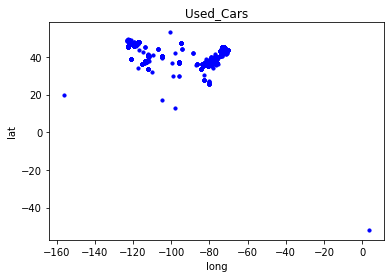

In [831]:
x_Long=data_After['long'] #plot untuk menampilkan Value dari atribut long dan lat 
y_Lat= data_After['lat'] 
# print(data)
plt.scatter(x_Long, y_Lat, s=10, c="b", marker="o")
plt.title('Used_Cars')
plt.xlabel('long')
plt.ylabel('lat')
plt.show()

In [832]:
#menentukkan nilai value dari kondisi long dan lat dan yang tidak sesuai dengan kondisi datanyanya dihapus
choice_outlier = data_After.loc[(data_After['long'] > 0.001 ) | (data_After['lat'] < 20 ) ] 
temp_clean= data_After.drop(choice_outlier.index)
temp_clean

,long,lat
0,-111.858,40.7372
1,-111.884,40.5881
2,-111.884,40.5881
3,-111.884,40.5881
4,-104.694,40.3744
...,...,...
19996,-119.128,46.2348
19997,-120.496,46.5642
19998,-118.293,46.0783
19999,-120.496,46.5642


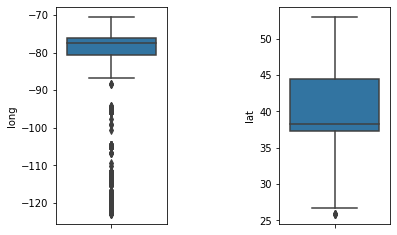

In [833]:
#cek apakah terdapat outliers
f, axes = plt.subplots(1, 2)
sns.boxplot(y=temp_clean["long"], ax=axes[0])
sns.boxplot(y=temp_clean["lat"], ax=axes[1])
plt.subplots_adjust(wspace=1)

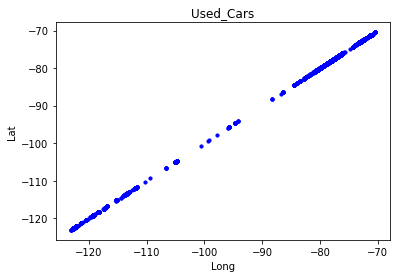

In [834]:
#plot value yang sudah di hapus kondisinya
x_Long=temp_clean['long']
y_Lat= temp_clean['long'] 
plt.scatter(x_Long, y_Lat, s=10, c="b", marker="o")
plt.title('Used_Cars')
plt.xlabel('Long')
plt.ylabel('Lat')

plt.show()

In [835]:
#normalisasi data untuk menentukan range yang sama 
#menggunakan atribut long
from sklearn.preprocessing import MinMaxScaler 
float_array1 = temp_clean['long'].values.astype(float)
float_array = float_array1.reshape(-1,1)
min_max_scaler_Long = MinMaxScaler()
scaled_array_Long = min_max_scaler_Long.fit_transform(float_array)
temp_clean['long'] = scaled_array_Long
temp_Long=pd.DataFrame(temp_clean['long'])
temp_Long

,long
0,0.213539
1,0.213045
2,0.213045
3,0.213045
4,0.349618
...,...
19996,0.075447
19997,0.049462
19998,0.091308
19999,0.049462


In [836]:
#normalisasi data untuk menentukan range yang sama 
#menggunakan atribut lat
float_array2 = temp_clean['lat'].values.astype(float)
float_array = float_array2.reshape(-1,1)
min_max_scaler_Lat = MinMaxScaler()
scaled_array_Lat = min_max_scaler_Lat.fit_transform(float_array)
temp_clean['lat'] = scaled_array_Lat
temp_Lat=pd.DataFrame(temp_clean['lat'])
temp_Lat

,lat
0,0.548293
1,0.542815
2,0.542815
3,0.542815
4,0.534964
...,...
19996,0.750266
19997,0.762368
19998,0.744517
19999,0.762368


In [837]:
import numpy as np #menggabungkan Atribut long dan lat yang valuenya sudah dinormalisasi
f1=temp_Long['long'].values
f2= temp_Lat['lat'].values
data_temp= np.array(list(zip(f1,f2)))
new_dt = pd.DataFrame(data_temp)
new_col =['long','lat']
new_dt =pd.DataFrame(data_temp,columns=new_col)
new_dt



,long,lat
0,0.213539,0.548293
1,0.213045,0.542815
2,0.213045,0.542815
3,0.213045,0.542815
4,0.349618,0.534964
...,...,...
16563,0.075447,0.750266
16564,0.049462,0.762368
16565,0.091308,0.744517
16566,0.049462,0.762368


# **Cluestering model 2**


cluestering Atribut **long dan lat**

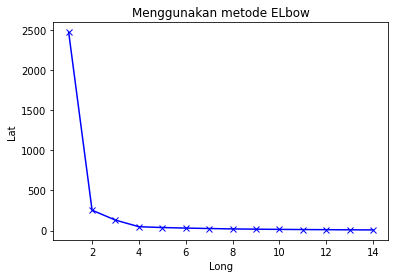

In [838]:
from sklearn.cluster import KMeans #untuk mengecek untuk mendapatkan nilai K yang terbaik dan tidak import library
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(new_dt)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Long')
plt.ylabel('Lat')
plt.title('Menggunakan metode ELbow')
plt.show()


In [839]:
df_1=new_dt
df_1

,long,lat
0,0.213539,0.548293
1,0.213045,0.542815
2,0.213045,0.542815
3,0.213045,0.542815
4,0.349618,0.534964
...,...,...
16563,0.075447,0.750266
16564,0.049462,0.762368
16565,0.091308,0.744517
16566,0.049462,0.762368


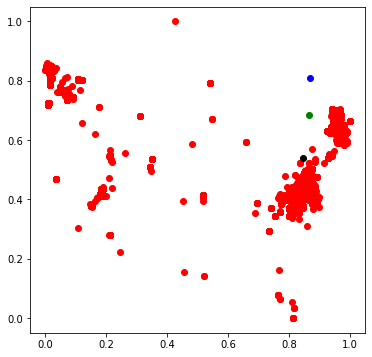

In [840]:
import random
k = 3
df_1=pd.DataFrame(new_dt)
centroids = {
    i+1: [np.random.choice(df_1['long']), np.random.choice(df_1['lat'])]
    for i in range(k)
}
    
fig = plt.figure(figsize=(6, 6))
plt.scatter(df_1['long'], df_1['lat'], color='r')
colmap = {1: 'g', 2: 'k', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
# plt.show()

In [0]:

def Euclidean_Distance(df_1, centroids):
    for i in centroids.keys():
        df_1['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df_1['long'] - centroids[i][0]) ** 2
                + (df_1['lat'] - centroids[i][1]) ** 2
            )
        )
    jarak_centroid = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df_1['rate_Jauh'] = df_1.loc[:, jarak_centroid].idxmin(axis=1)
    df_1['rate_Jauh'] = df_1['rate_Jauh'].map(lambda x: int(x.lstrip('distance_from_')))
    df_1['color'] = df_1['rate_Jauh'].map(lambda x: colmap[x])
    return df_1

df_1 = Euclidean_Distance(df_1, centroids)

In [0]:
import copy
old_centroids = copy.deepcopy(centroids)
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df_1[df_1['rate_Jauh'] == i]['long'])
        centroids[i][1] = np.mean(df_1[df_1['rate_Jauh'] == i]['lat'])
    return k



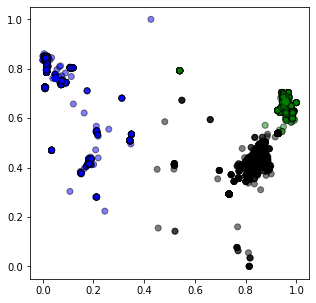

In [843]:
while True:
    cendroid_terdekat = df_1['rate_Jauh'].copy(deep=True)
    centroids = update(centroids)
    df_1 = Euclidean_Distance(df_1, centroids)
    if cendroid_terdekat.equals(df_1['rate_Jauh']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df_1['long'], df_1['lat'], color=df_1['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

In [844]:
df_1

,long,lat,distance_from_1,distance_from_2,distance_from_3,rate_Jauh,color
0,0.213539,0.548293,0.751405,0.654593,0.270739,3,b
1,0.213045,0.542815,0.752788,0.654145,0.274786,3,b
2,0.213045,0.542815,0.752788,0.654145,0.274786,3,b
3,0.213045,0.542815,0.752788,0.654145,0.274786,3,b
4,0.349618,0.534964,0.620198,0.518390,0.378056,3,b
...,...,...,...,...,...,...,...
16563,0.075447,0.750266,0.883600,0.844148,0.030469,3,b
16564,0.049462,0.762368,0.910644,0.872776,0.002160,3,b
16565,0.091308,0.744517,0.867286,0.827289,0.047327,3,b
16566,0.049462,0.762368,0.910644,0.872776,0.002160,3,b


# **Klasifikasi** **model 1** 



## Native Bayes

In [845]:
del df_x['distance_from_1']
del df_x['distance_from_2']
del df_x['distance_from_3']
del df_x['distance_from_4']
del df_x['distance_from_5']
del df_x['distance_from_6']
df_x


,odometer,long,rate_jarak,color
0,0.468691,0.349556,5,dodgerblue
1,0.207277,0.349556,2,k
2,0.141915,0.349556,2,k
3,0.554819,0.349556,5,dodgerblue
4,0.987638,0.349556,5,dodgerblue
...,...,...,...,...
8343,0.868883,0.072377,5,dodgerblue
8344,0.678553,0.091221,5,dodgerblue
8345,0.470660,0.072377,5,dodgerblue
8346,0.040755,0.075359,2,k


In [0]:
#labelling untuk menentukkan hasil antara odometer dan long
df_x.loc[df_x['rate_jarak'] ==1, 'rate_jarak'] = 'sangat_bagus'
df_x.loc[df_x['rate_jarak'] ==2, 'rate_jarak'] = 'bagus'
df_x.loc[df_x['rate_jarak'] ==3, 'rate_jarak'] = 'standard'
df_x.loc[df_x['rate_jarak'] ==4, 'rate_jarak'] = 'kurang'
df_x.loc[df_x['rate_jarak'] ==5, 'rate_jarak'] = 'sangat_kurang'
df_x.loc[df_x['rate_jarak'] ==6, 'rate_jarak'] = 'tidak_disarankan'

In [847]:
df_x

,odometer,long,rate_jarak,color
0,0.468691,0.349556,sangat_kurang,dodgerblue
1,0.207277,0.349556,bagus,k
2,0.141915,0.349556,bagus,k
3,0.554819,0.349556,sangat_kurang,dodgerblue
4,0.987638,0.349556,sangat_kurang,dodgerblue
...,...,...,...,...
8343,0.868883,0.072377,sangat_kurang,dodgerblue
8344,0.678553,0.091221,sangat_kurang,dodgerblue
8345,0.470660,0.072377,sangat_kurang,dodgerblue
8346,0.040755,0.075359,bagus,k


In [0]:
from sklearn.datasets import load_iris



In [0]:
fitur_1 = pd.DataFrame({
    'odometer' : df_x["odometer"],
    'long': df_x["long"],
    
})


In [0]:
class_cla1= df_x['rate_jarak']


In [0]:

from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(fitur_1,class_cla1, test_size=0.3,random_state=109) 

In [0]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)
# y_pred
# print("kelas prediksi")
# for i in range(len(y_pred)):
#     print(y_pred[i])

# **Klasifikasi 2**

## KNN

In [866]:
del df_1['distance_from_1']
del df_1['distance_from_2'] 
del df_1['distance_from_3']
df_1

,long,lat,rate_Jauh,color
0,0.213539,0.548293,jauh,b
1,0.213045,0.542815,jauh,b
2,0.213045,0.542815,jauh,b
3,0.213045,0.542815,jauh,b
4,0.349618,0.534964,jauh,b
...,...,...,...,...
16563,0.075447,0.750266,jauh,b
16564,0.049462,0.762368,jauh,b
16565,0.091308,0.744517,jauh,b
16566,0.049462,0.762368,jauh,b


In [0]:
#labelling untuk menentukan apakah lat ke long jaraknya dekat, cukup apa jauh
df_1.loc[df_1['rate_Jauh'] ==1, 'rate_Jauh'] = 'dekat'
df_1.loc[df_1['rate_Jauh'] ==2, 'rate_Jauh'] = 'cukup'
df_1.loc[df_1['rate_Jauh'] ==3, 'rate_Jauh'] = 'jauh'

In [871]:
df_1

,long,lat,rate_Jauh,color
0,0.213539,0.548293,jauh,b
1,0.213045,0.542815,jauh,b
2,0.213045,0.542815,jauh,b
3,0.213045,0.542815,jauh,b
4,0.349618,0.534964,jauh,b
...,...,...,...,...
16563,0.075447,0.750266,jauh,b
16564,0.049462,0.762368,jauh,b
16565,0.091308,0.744517,jauh,b
16566,0.049462,0.762368,jauh,b


In [0]:
from sklearn.datasets import load_iris


In [0]:
fitur_2 = pd.DataFrame({
    'long' : df_1["long"],
    'lat': df_1["lat"],
    
})

In [0]:
class_cla2= df_1['rate_Jauh']

In [0]:
# from sklearn.model_selection import train_test_split 
# X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(fitur_2, class_cla2, test_size=0.3, random_state=1)
from sklearn.model_selection import train_test_split   
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(fitur_2, class_cla2, test_size=0.20)



In [869]:
#Import svm model
# from sklearn import svm

# #Create a svm Classifier
# clf = svm.SVC(kernel='linear') # Linear Kernel

# #Train the model using the training sets
# clf.fit(X_train_1, y_train_1)

# #Predict the response for test dataset
# y_pred_1 = clf.predict(X_test_1)
# y_pred_1
from sklearn.neighbors import KNeighborsClassifier # from sklearn import KNN
knn=KNeighborsClassifier(n_neighbors=3) # 
knn.fit(X_train_1, y_train_1)
y_pred_1 = knn.predict(X_test_1)
y_pred_1

array(['cukup', 'jauh', 'dekat', ..., 'dekat', 'cukup', 'dekat'],
      dtype=object)

# **Evaluation**





## Native Bayes

In [0]:
from sklearn import metrics 
print('Hasil menggunakan Naive Bayes  Klasifikasi pertama: ')
print("Nilai Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Nilai Precision:",metrics.precision_score(y_test, y_pred,average='macro' ))
print("Nilai F1 ",metrics.precision_score(y_test, y_pred,average='macro'))
print("Nilai Recall:",metrics.recall_score(y_test, y_pred, average='macro'))

## KNN


In [0]:
from sklearn import metrics
print('Hasil menggunakan KNN Klasifikasi kedua:')
print("Nilai Accuracy:",metrics.accuracy_score(y_test_1, y_pred_1))
print("Nilai Precision:",metrics.precision_score(y_test_1, y_pred_1,average='macro' ))
print("Nilai F1-SCORE ",metrics.precision_score(y_test_1, y_pred_1,average='macro'))
print("Nilai Recall:",metrics.recall_score(y_test_1, y_pred_1, average='macro'))

## Pembanding Native bayes dengan KNN

In [0]:
from sklearn import metrics 
temp1= metrics.accuracy_score(y_test, y_pred)
temp2 = metrics.accuracy_score(y_test_1, y_pred_1)

if temp1 > temp2:
  hasilT=temp1
else:
  hasilT=temp2

print('hasil yang Accurate Terbaik adalah = ', hasilT)